In [1]:
import pandas as pd
import numpy as np
import cptac
import cptac.utils as ut
import operator
from IPython.display import Image


import re 
import matplotlib.pyplot as plt
from scipy import stats
import gseapy as gp
from gseapy.plot import barplot, dotplot

import plot_utils as p

In [26]:
en = cptac.Endometrial()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [27]:
rep = ut.get_proteins_in_pathway('DNA Replication')

In [28]:
prot_genes = []
for gene in rep:
    gene += "_proteomics"
    prot_genes.append(gene)
    

In [30]:
root = R'~\Github\WhenMutationsDontMatter\PTEN\Step_3_trans_effect\csv'
prot_df = pd.read_csv(root+R"\endo_pval_medians.csv")

b_df = prot_df.Proteomics.isin(prot_genes)
vals = prot_df[b_df]
df = vals.replace('_proteomics', '', regex = True)
df = df.set_index('Proteomics')
df.to_csv('dna_rep_en.csv')

In [31]:
df

,Gbm_P_Value,Gbm_Median
Proteomics,,
MCM6,0.000014,1.085407
MCM4,0.000014,1.236484
PCNA,0.000019,0.631486
POLD2,0.000020,0.405249
POLD3,0.000036,0.483613
RFC5,0.000037,0.481635
MCM5,0.000041,0.870533
MCM2,0.000041,0.939513
MCM7,0.000053,1.036455


In [43]:
ut.reactome_pathway_overlay(
    df, 
    "R-HSA-68962.3", 
    open_browser=True)

AttributeError: 'str' object has no attribute 'copy'

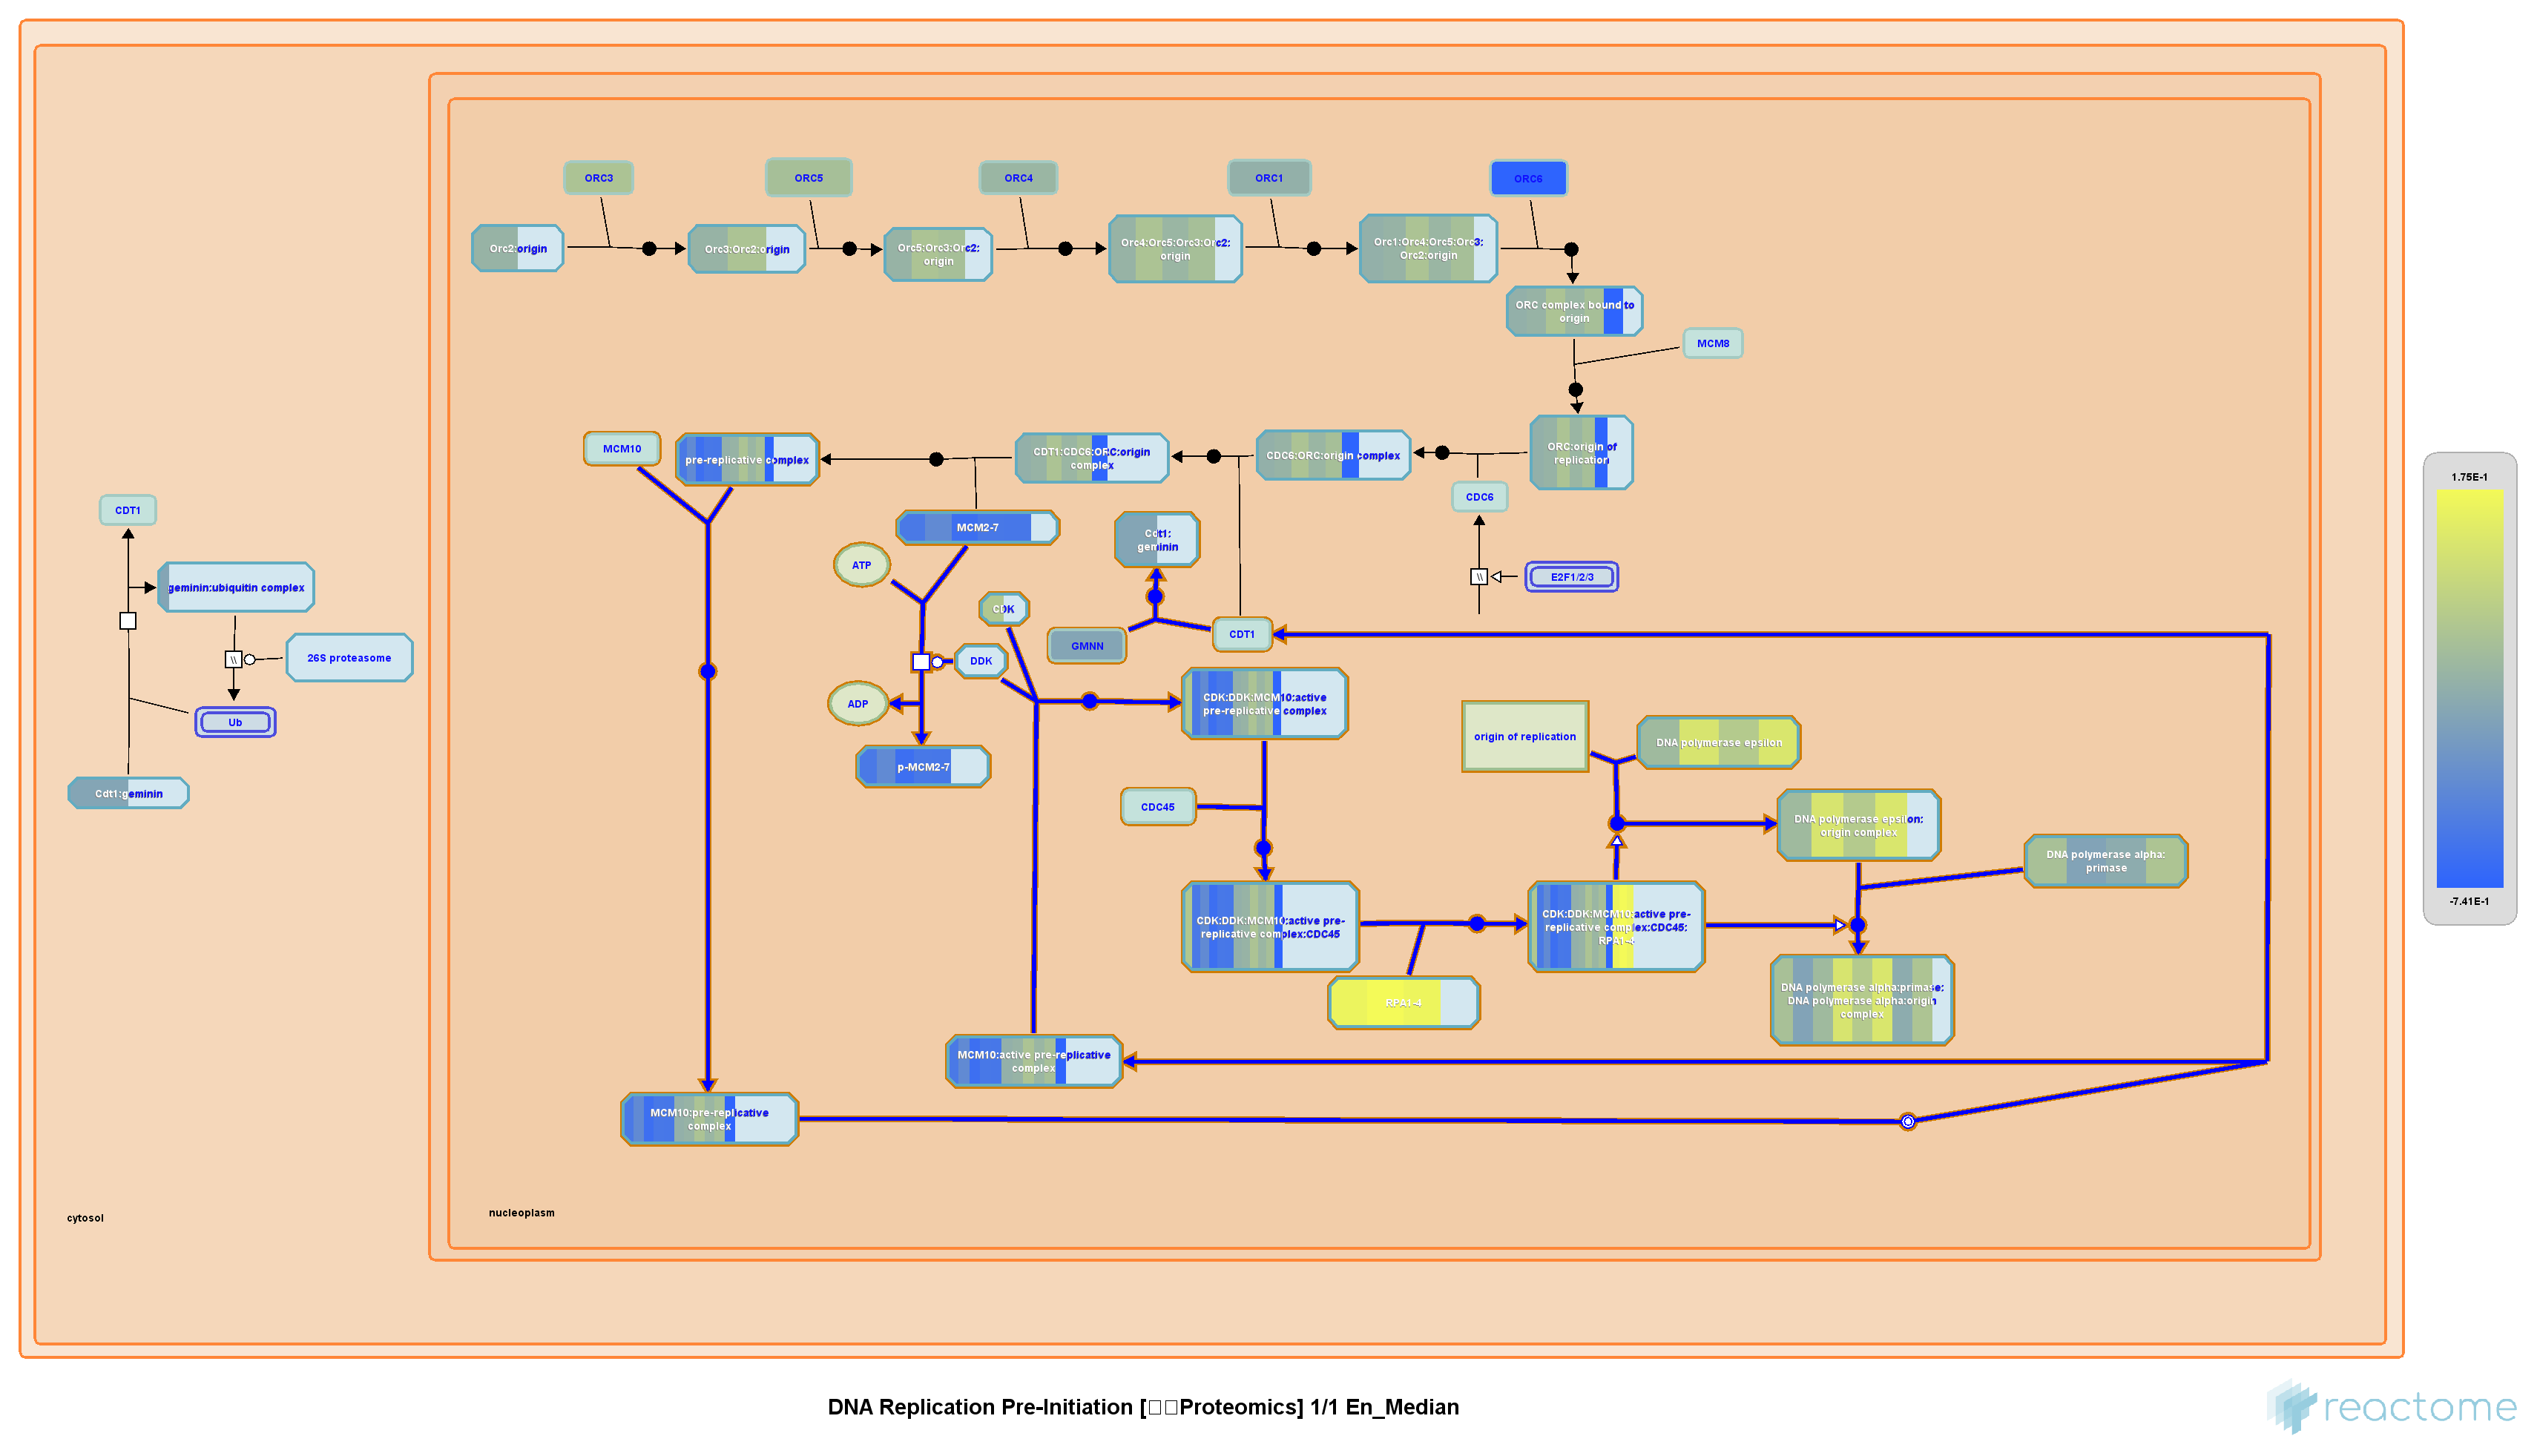

In [49]:
image_path = ut.reactome_pathway_overlay(
    df=df,
    pathway="R-HSA-68962.3",
    open_browser=False,
    export_path="test.png")

Image(image_path)

In [60]:
image_path = ut.reactome_pathway_overlay(
    df=df,
    pathway="R-HSA-68962.3",
    open_browser=True
)

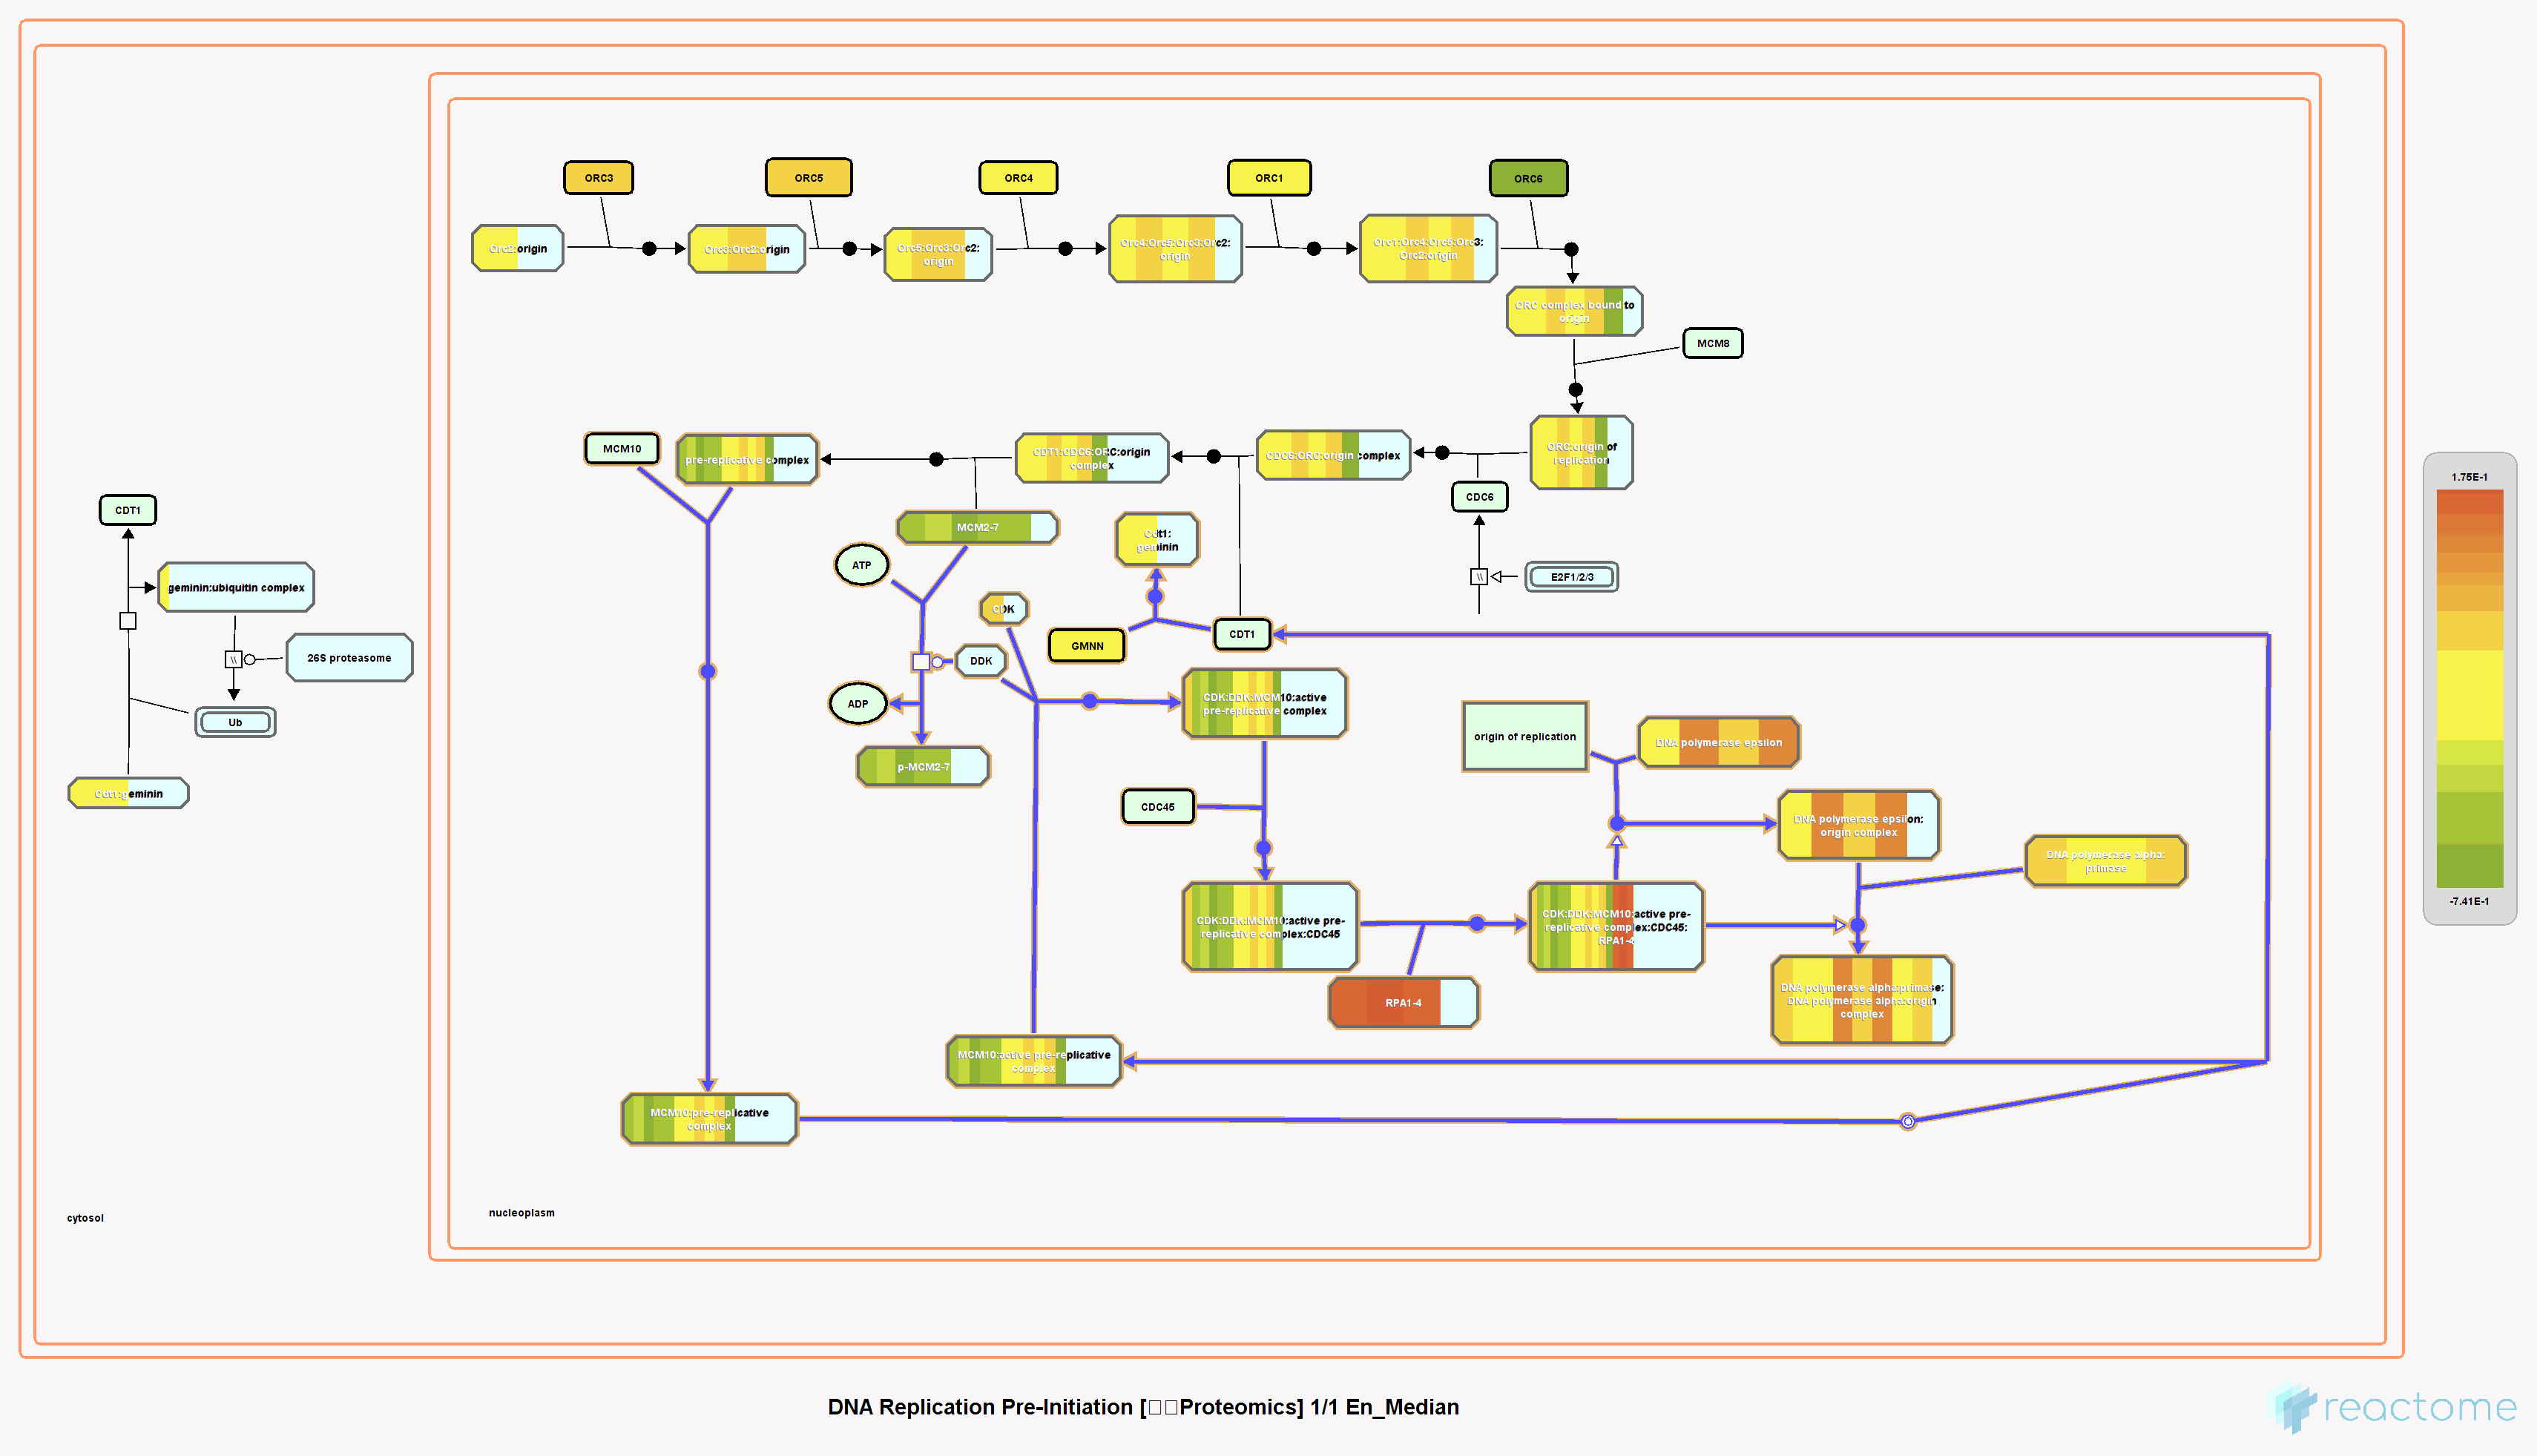

In [59]:
image_path = ut.reactome_pathway_overlay(
    df=df,
    pathway="R-HSA-68962.3",
    open_browser=False,
    export_path="test.gif",
    image_format="gif",
    display_col_idx=0,
    diagram_colors="Standard",
    overlay_colors="Strosobar",
    quality=7
)

Image(image_path)